GSPC DataAnalyze

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
## load data set
df_raw = pd.read_csv('GSPC.csv')


In [3]:
df_raw.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [4]:
## shoose feature
df_adjclose = df_raw[['Date', 'Adj Close']]


In [5]:
df_adjclose.head()


,Date,Adj Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000


In [6]:
df_adjclose.describe()


,Adj Close
count,23300.000000
mean,484.025642
std,720.770007
min,4.400000
25%,23.840000
50%,99.459999
75%,829.322509
max,3580.840088


In [7]:
df_adjclose.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23300 entries, 0 to 23299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23300 non-null  object 
 1   Adj Close  23300 non-null  float64
dtypes: float64(1), object(1)
memory usage: 364.2+ KB


In [8]:
## change col type
df_adjclose['Date'] = pd.to_datetime(df_adjclose['Date'],format="%Y-%m-%d")


<ipython-input-8-9e90cc210a4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose['Date'] = pd.to_datetime(df_adjclose['Date'],format="%Y-%m-%d")


In [9]:
## set index
df_adjclose.set_index('Date', inplace=True)


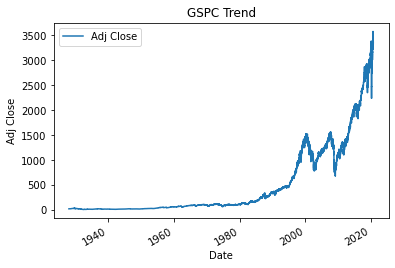

In [10]:
## plot the trend
df_adjclose.plot()
plt.title('GSPC Trend')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

In [11]:
## shift the line
df_adjclose['Adj Close'].shift(1)

Date
1927-12-30            NaN
1928-01-03      17.660000
1928-01-04      17.760000
1928-01-05      17.719999
1928-01-06      17.549999
                 ...     
2020-09-28    3298.459961
2020-09-29    3351.600098
2020-09-30    3335.469971
2020-10-01    3363.000000
2020-10-02    3380.800049
Name: Adj Close, Length: 23300, dtype: float64

In [12]:
df_adjclose['Adj Close']

Date
1927-12-30      17.660000
1928-01-03      17.760000
1928-01-04      17.719999
1928-01-05      17.549999
1928-01-06      17.660000
                 ...     
2020-09-28    3351.600098
2020-09-29    3335.469971
2020-09-30    3363.000000
2020-10-01    3380.800049
2020-10-02    3348.419922
Name: Adj Close, Length: 23300, dtype: float64

In [13]:
## calculate Return col
df_adjclose['Return'] = df_adjclose['Adj Close'] - df_adjclose['Adj Close'].shift(1)

<ipython-input-13-5ff6302bfcbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose['Return'] = df_adjclose['Adj Close'] - df_adjclose['Adj Close'].shift(1)


In [14]:
## fill in the first NaN
df_adjclose['Return'].fillna(0, inplace = True)

/opt/anaconda/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
df_adjclose

,Adj Close,Return
Date,,
1927-12-30,17.660000,0.000000
1928-01-03,17.760000,0.100000
1928-01-04,17.719999,-0.040001
1928-01-05,17.549999,-0.170000
1928-01-06,17.660000,0.110001
...,...,...
2020-09-28,3351.600098,53.140137
2020-09-29,3335.469971,-16.130127
2020-09-30,3363.000000,27.530029


In [16]:
## plot it
df_return = df_adjclose['Return']

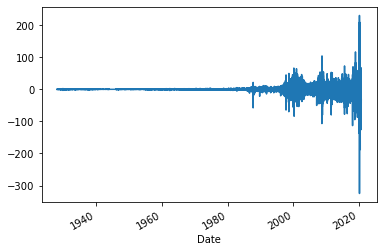

In [17]:
df_return.plot()

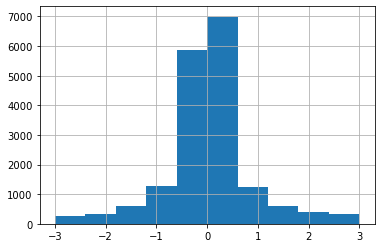

In [18]:
df_return.hist(range=(-3, 3))

In [19]:
return_avg = df_return.mean()

In [20]:
df_return.describe()

count    23300.000000
mean         0.142951
std         10.084173
min       -324.890137
25%         -0.379998
50%          0.020001
75%          0.520004
max        230.380127
Name: Return, dtype: float64

In [21]:
return_avg

0.1429510696137339

In [22]:
return_std = df_return.std()

In [23]:
return_std

10.084173415896878

In [24]:
## calculate the scaled return col (Z-score)
df_adjclose['ScaledReturn'] = (df_adjclose['Return'] - return_avg) / return_std

<ipython-input-24-05754efc0b8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose['ScaledReturn'] = (df_adjclose['Return'] - return_avg) / return_std


In [25]:
df_adjclose

,Adj Close,Return,ScaledReturn
Date,,,
1927-12-30,17.660000,0.000000,-0.014176
1928-01-03,17.760000,0.100000,-0.004259
1928-01-04,17.719999,-0.040001,-0.018142
1928-01-05,17.549999,-0.170000,-0.031034
1928-01-06,17.660000,0.110001,-0.003268
...,...,...,...
2020-09-28,3351.600098,53.140137,5.255481
2020-09-29,3335.469971,-16.130127,-1.613725
2020-09-30,3363.000000,27.530029,2.715848


In [26]:
## plot the ScaledReturn
df_ScaledReturn = df_adjclose['ScaledReturn']

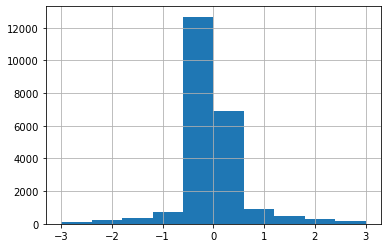

In [36]:
df_ScaledReturn.hist(range=(-3, 3))